In [1]:
import xarray as xr
from glob import glob
import os
import numpy as np

In [87]:
base_folder = '/g/data/vf71/la6889/dbpm_inputs/weddell/gridded/1deg/'
# var = ['er', 'intercept', 'lphy', 'slope', 'sphy']
var = ['lphy', 'sphy']
exp = ['ctrlclim', 'obsclim', 'spinup', 'stable-spin']

In [88]:
# [ctrl_fn] = glob(os.path.join(base_folder, '025deg', f'*_ctrlclim_{var[0]}_*'))
# [obs_fn] = glob(os.path.join(base_folder, '025deg', f'*_ctrlclim_{var[0]}_*'))
[ctrl_target] = glob(os.path.join(base_folder, f'*_ctrlclim_{var[0]}_*'))
[obs_target] = glob(os.path.join(base_folder, f'*_obsclim_{var[0]}_*'))

In [89]:
ds_ctrl = abs(xr.open_zarr(ctrl_target)[var[0]].diff(dim = 'time'))
ds_obs = abs(xr.open_zarr(obs_target)[var[0]].diff(dim = 'time'))


In [92]:
def lowest_maximum_absolute_diff(folder_path, var_name, prop = 1):
    '''
    folder_path (character) - Full path to folder containing files of interest
    var_name (character) - Name of variable of interest as included in file name
    prop (numeric) - Default is 1. Multiplier to be applied to lowest maximum
    absolute difference if problems with model persist
    '''
    # Find ctrlclim and obsclim files
    [ctrl_file] = glob(os.path.join(base_folder, f'*_ctrlclim_{var_name}_*'))
    [obs_file] = glob(os.path.join(base_folder, f'*_obsclim_{var_name}_*'))
    # Load files
    ds_ctrl = abs(xr.open_zarr(ctrl_target)[var_name].diff(dim = 'time'))
    ds_obs = abs(xr.open_zarr(obs_target)[var_name].diff(dim = 'time'))
    # Calculate lowest maximum difference
    low_max_diff = min(ds_ctrl.max().values, ds_obs.max().values)
    return low_max_diff*prop

In [93]:
lowest_maximum_absolute_diff(base_folder, var[0])

0.6531239748001099

In [91]:
min(ds_ctrl.max().values, ds_obs.max().values)

array(0.653124, dtype=float32)

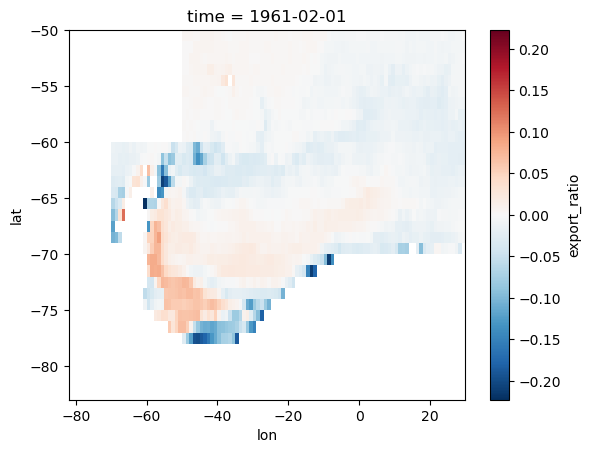

In [73]:
ds_ctrl.isel(time = 0).plot()

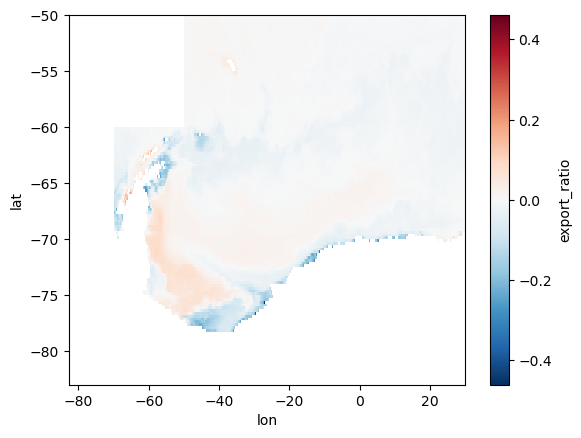

In [35]:
y = ds.isel(time = 1)-ds.isel(time = 0)
y['export_ratio'].plot()

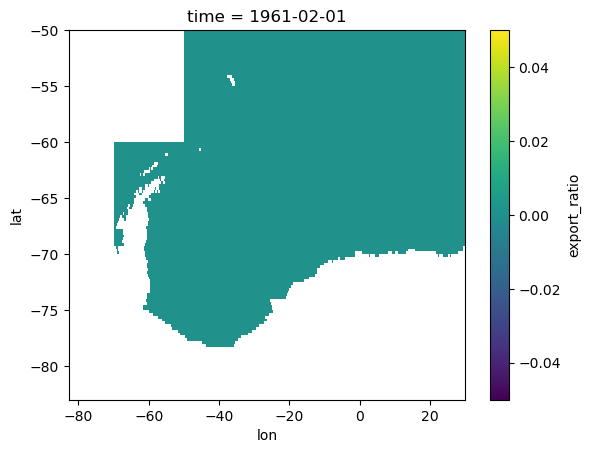

In [38]:
(x.isel(time = 0)-y)['export_ratio'].plot()